### Testing Evo

#### Imports

In [379]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer

%run graphUtils.py
%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [311]:
n = 10
popsize = 10
generations = 100
batch_size = 8
wrap_around = True
name = 'centered14'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, popsize)

[2023-03-13 16:00:27] INFO     <76480> evotorch.core: Instance of `Custom_NEProblem` (id:4595596256) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-13 16:00:27] INFO     <76480> evotorch.core: Instance of `Custom_NEProblem` (id:4595596256) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-13 16:00:27] INFO     <76480> evotorch.core: Instance of `Custom_NEProblem` (id:4595596256) -- The `device` of the problem is set as cpu
[2023-03-13 16:00:27] INFO     <76480> evotorch.core: Instance of `Custom_NEProblem` (id:4595596256) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-13 16:00:27] INFO     <76480> evotorch.core: Instance of `Custom_NEProblem` (id:4595596256) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [240]:
trainer.train(generations, name)

         iter : 2501
     stepsize : ReadOnlyTensor(0.0140)
    mean_eval : 59.54634475708008
  median_eval : 59.307159423828125
pop_best_eval : 62.95556640625

         iter : 2502
     stepsize : ReadOnlyTensor(0.0140)
    mean_eval : 59.52264404296875
  median_eval : 59.28144836425781
pop_best_eval : 65.88874816894531

         iter : 2503
     stepsize : ReadOnlyTensor(0.0140)
    mean_eval : 60.4264030456543
  median_eval : 59.50141906738281
pop_best_eval : 66.53900146484375

         iter : 2504
     stepsize : ReadOnlyTensor(0.0140)
    mean_eval : 56.22802734375
  median_eval : 54.91389465332031
pop_best_eval : 62.900733947753906

         iter : 2505
     stepsize : ReadOnlyTensor(0.0140)
    mean_eval : 57.91333770751953
  median_eval : 58.42517852783203
pop_best_eval : 64.40769958496094

         iter : 2506
     stepsize : ReadOnlyTensor(0.0141)
    mean_eval : 56.42145538330078
  median_eval : 54.65773391723633
pop_best_eval : 61.75583267211914

         iter : 2507
     s

In [241]:
network = trainer.get_trained_network()

In [242]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
network.load_state_dict(torch.load('../models/' + name + '.pth'))

<All keys matched successfully>

In [243]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [244]:
#trainer.searcher.status

#### Visualize trained network

In [383]:
v_batch_size= 8
graphs = [generate_organism(n, device).toGraph() for _ in range(v_batch_size)]
loader = DataLoader(graphs, batch_size=v_batch_size)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around, v_batch_size)
network.batch_size = v_batch_size
network(graph, 0)

DataBatch(x=[480, 5], edge_index=[1, 0], device=[8], subsize=[8], energy=[8], velocity=[8], border_cost=[8], food_reward=[8], dead_cost=[8], visible_food=[8], food_avg_dist=[8], food_avg_degree=[8], food_search_movement=[8], batch=[480], ptr=[9])

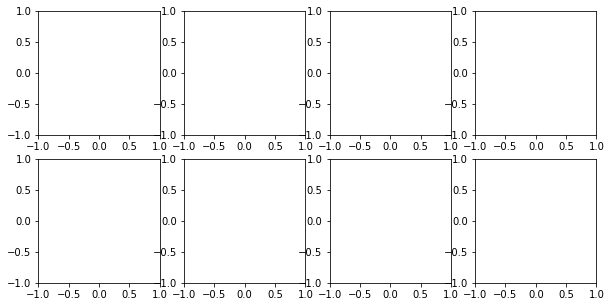

In [384]:
anim = visualizer.animate_organism(graph, network, food=30, frames=200)
visualizer.save_animation_to_gif(anim, name, 10)

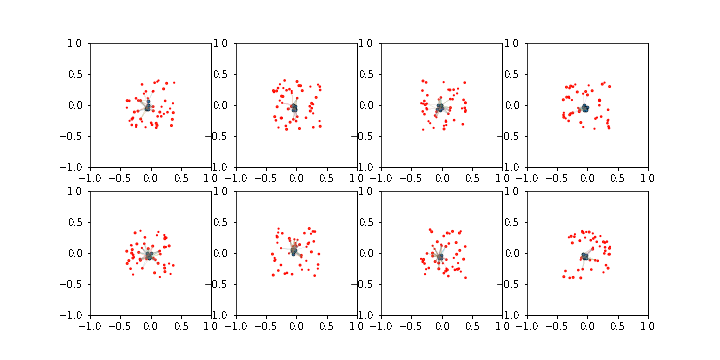

In [385]:
Image('../animation/' + name + '.gif')

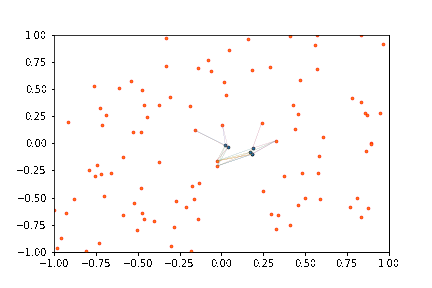

In [248]:
Image('../animation/GATConv1.gif')

In [249]:
anim.frame_seq = anim.new_saved_frame_seq() 
IPython.display.HTML(anim.to_jshtml())

In [250]:
print(network)

Conv(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp_middle): Sequential(
    (0): Linear(in_features=4, out_features=2, bias=True)
    (1): Tanh()
  )
  (mlp): Sequential(
    (0): Tanh()
    (1): Linear(in_features=2, out_features=2, bias=True)
    (2): Tanh()
  )
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
    (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
    (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
  )
  (mlp_edge): Sequential(
    (0): Linear(in_features=3, out_features=3, bias=True)
    (1): Tanh()
    (2): Linear(in_features=3, out_features=3, bias=True)
    (3): Tanh()
  )
  (conv_layer_cells): CustomConvSim

In [251]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_z): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_r): ChebConv(2, 2, K=1, normalization=sym)
  (conv_x_h): ChebConv(2, 2, K=1, normalization=sym)
  (conv_h_h): ChebConv(2, 2, K=1, normalization=sym)
)
tensor([ 1.1863, -0.5844])
tensor([[-0.7351,  0.3150],
        [ 0.7337, -0.0704]])
tensor([-0.5811, -0.6753])
tensor([[-0.8218, -0.5664],
        [-0.4702, -0.0187]])
tensor([1.1126, 0.9436])
tensor([[-0.1563,  0.2614],
        [-0.0484, -0.7858]])
tensor([-0.2858,  0.8628])
tensor([[-0.0050, -0.5785],
        [-1.1689, -0.0497]])
tensor([-0.5171, -1.2026])
tensor([[-0.0728, -0.0536],
        [ 0.5403, -0.4884]])
tensor([-0.2097,  0.0538])
tensor([[ 0.3604, -0.0883],
        [-0.3809, -1.0815]])


In [252]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

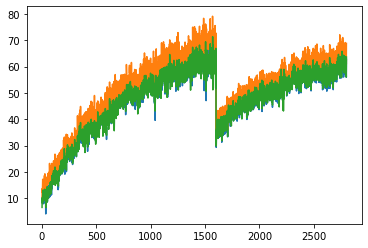

In [253]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

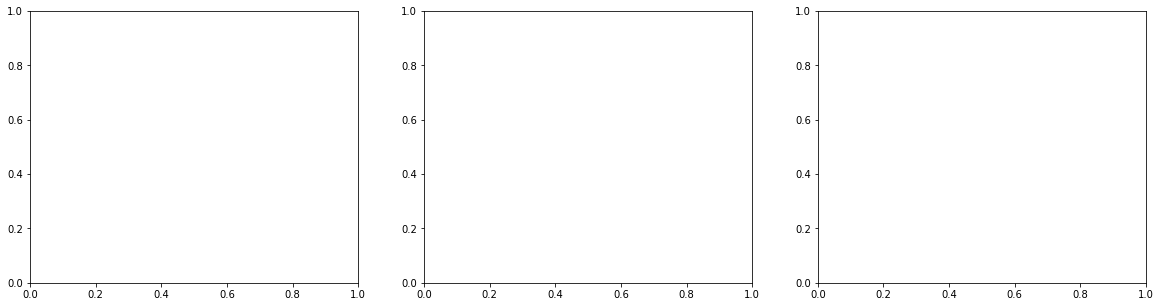

In [224]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()

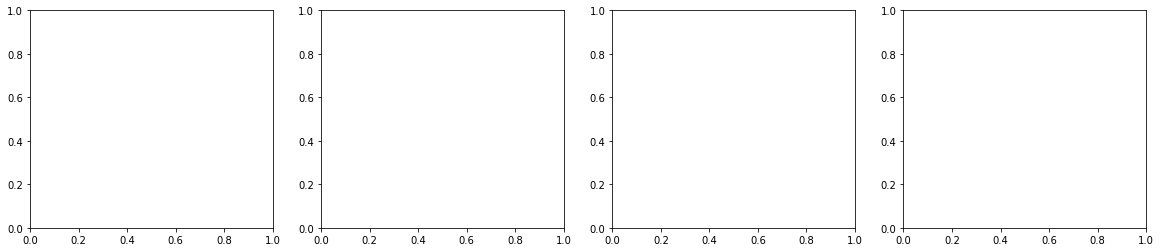

In [263]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
